### Import Dependacies 

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


from geopy.distance import geodesic

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data=pd.read_csv('202406-baywheels-tripdata.csv')
data.shape

(303100, 13)

### EDA

In [3]:
data.head()
#displays the first few rows of the dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5219C69D4940A86C,classic_bike,2024-06-10 17:44:01.225,2024-06-10 17:48:29.667,14th Ave at Geary Blvd,SF-G10-2,23rd Ave at Clement St,SF-G7,37.780364,-122.472809,37.781929,-122.482786,member
1,6104B815856FDC57,classic_bike,2024-06-23 16:36:36.357,2024-06-23 16:57:29.618,In Chan Kaajal Park,SF-N23,Delancey St at Brannan St,SF-H30-2,37.763735,-122.415524,37.783844,-122.390002,member
2,BEC4F4017371E14A,electric_bike,2024-06-04 07:47:22.616,2024-06-04 08:15:45.955,14th Ave at Geary Blvd,SF-G10-2,Market St at Steuart St,SF-E29-2,37.780397,-122.472894,37.794525,-122.394880,member
3,55D40C06BF9BDB86,electric_bike,2024-06-11 15:52:00.248,2024-06-11 16:12:14.476,Francisco St at Columbus Ave,SF-A24-2,South Park St at 3rd St,SF-I29-2,37.804445,-122.415804,37.780760,-122.394989,member
4,78EAB3CE0BFD26E3,electric_bike,2024-06-13 15:55:40.301,2024-06-13 16:06:59.542,Terry Francois Blvd at Warriors Way,SF-M30-2,Union Square,SF-F26,37.769263,-122.386198,37.788300,-122.408531,member


In [4]:
data.info()
# displays the data type of each column and the number of non_null counts in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303100 entries, 0 to 303099
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             303100 non-null  object 
 1   rideable_type       303100 non-null  object 
 2   started_at          303100 non-null  object 
 3   ended_at            303100 non-null  object 
 4   start_station_name  287215 non-null  object 
 5   start_station_id    287215 non-null  object 
 6   end_station_name    283292 non-null  object 
 7   end_station_id      283181 non-null  object 
 8   start_lat           303100 non-null  float64
 9   start_lng           303100 non-null  float64
 10  end_lat             303021 non-null  float64
 11  end_lng             303021 non-null  float64
 12  member_casual       303100 non-null  object 
dtypes: float64(4), object(9)
memory usage: 30.1+ MB


##### Duplicates

In [5]:
# check for duplicates
data[data.duplicated(keep=False)].sort_values(by='ride_id')
# no duplicates on this dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


##### Missing Values

In [6]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15885
start_station_id      15885
end_station_name      19808
end_station_id        19919
start_lat                 0
start_lng                 0
end_lat                  79
end_lng                  79
member_casual             0
dtype: int64

In [7]:
data[data.start_station_name.isna() & data.start_station_id.notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [8]:
data[data.start_station_name.notna() & data.start_station_id.isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [9]:
data[data.end_station_name.isna() & data.end_station_id.notna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [10]:
data[data.end_station_name.notna() & data.end_station_id.isna()]
# we can illustrate filling nans by mapping using this case
# fill the missing end_station_ids with respect with their present end_station_name

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
826,3031B91E65D68A45,electric_bike,2024-06-17 20:05:27.155,2024-06-17 20:10:00.509,Dolores St at 15th St,SF-M21,Octavia Blvd at Page St,NaN,37.766155,-122.426685,37.77,-122.42,casual
5209,8EEF02D5C3AEE72C,electric_bike,2024-06-09 10:54:48.887,2024-06-09 11:00:44.441,20th St at Dolores St,SF-P21,29th St at Tiffany Ave,NaN,37.758278,-122.426086,37.74,-122.42,casual
9695,6DA1B536BD93C29B,electric_bike,2024-06-18 16:41:28.383,2024-06-18 16:52:16.514,Harrison St at 20th St,SF-P24,Octavia Blvd at Page St,NaN,37.758799,-122.412599,37.77,-122.42,casual
13053,733EED09E9E70363,electric_bike,2024-06-27 15:07:56.245,2024-06-27 15:21:13.327,Mississippi St at 17th St,SF-N29,San Francisco Ferry Building,NaN,37.764964,-122.394801,37.80,-122.39,casual
13054,E3ADA56227748525,electric_bike,2024-06-27 06:24:33.640,2024-06-27 06:28:18.691,McAllister St at Arguello Blvd,SF-J13,Anza St at Collins St,NaN,37.775356,-122.458102,37.78,-122.45,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288475,D40B59E0D0DCF54F,electric_bike,2024-06-16 18:29:54.955,2024-06-16 18:42:41.475,The Embarcadero at Sansome St,SF-A27,San Francisco Caltrain East,NaN,37.804769,-122.403200,37.78,-122.39,casual
289611,172C395572393982,electric_bike,2024-06-17 21:30:17.148,2024-06-17 21:40:09.834,Grove St at Divisadero,SF-J18,7th Ave at Irving St,NaN,37.775966,-122.437744,37.76,-122.46,member
294845,3CD2BCBEEBB23BE6,electric_bike,2024-06-17 11:07:29.698,2024-06-17 11:12:13.192,NaN,NaN,22nd St Caltrain Station,NaN,37.770000,-122.390000,37.76,-122.39,member
295789,60650D7013D3A4F5,electric_bike,2024-06-16 04:33:53.575,2024-06-16 04:50:11.910,Valencia St at 24th St,SF-Q22-2,Leavenworth St at Broadway,NaN,37.752433,-122.420582,37.80,-122.42,member


In [11]:
mapping_data=data[['end_station_name','end_station_id']].drop_duplicates()
mapping_data.dropna(inplace=True)
mapping_data.isnull().sum()

end_station_name    0
end_station_id      0
dtype: int64

In [12]:
#zip the data and create a dictionary
mappings=dict(zip(mapping_data.end_station_name,mapping_data.end_station_id))
mappings

{'23rd Ave at Clement St': 'SF-G7',
 'Delancey St at Brannan St': 'SF-H30-2',
 'Market St at Steuart St': 'SF-E29-2',
 'South Park St at 3rd St': 'SF-I29-2',
 'Union Square': 'SF-F26',
 'Fillmore St at Jefferson St': 'SF-A19',
 '25th Ave at Irving St': 'SF-M7',
 'Post St at Baker St': 'SF-G17',
 'Powell St at Columbus Ave': 'SF-C25',
 'San Francisco Caltrain West': 'SF-J29',
 'Hospital St at Mariposa St': 'SF-N30',
 'Scott St at Golden Gate Ave': 'SF-I19',
 'Berry St at King St': 'SF-L28',
 'Eureka Valley Recreation Center': 'SF-O18',
 'Cyril Magnin St at Ellis St': 'SF-G26',
 '21st St at 5th Ave': 'OK-K10',
 'Otis St at Brady St': 'SF-K23',
 'McCoppin St at Valencia St': 'SF-K22-2',
 'Larkin St at California St': 'SF-F23-3',
 'San Pedro St at Hedding St': 'SJ-H9',
 'Julian St at 6th St': 'SJ-K11',
 'Buchanan St at North Point St': 'SF-A20',
 'Lyon St at Fell St': 'SF-K17',
 'Jackson Playground': 'SF-N28',
 'Leavenworth St at Broadway': 'SF-D24',
 'Davis St at Jackson St': 'SF-D28',
 '

In [13]:
# map the missing end_station_ids using the end_station_names
data['end_station_id']=data['end_station_name'].map(mappings)

In [14]:
data[data.end_station_name.notna() & data.end_station_id.isna()]
#we clearly see the mapping worked
#we may not require the end_station_ids in this case but the mapping technique can be handy in many situations

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [15]:
#we consider dropping the remaining nans
data.dropna(inplace=True)

In [16]:
data[data.end_station_name =='Raymond Kimbell Playground']
# filtering [first creat a mask (Booleans) then apply your data]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
14909,EB47AC01455F85B5,classic_bike,2024-06-21 13:04:56.481,2024-06-21 13:06:21.641,Ellis St at Pierce St,SF-H19,Raymond Kimbell Playground,SF-G19,37.781982,-122.435770,37.783813,-122.434559,member
14911,F48FC2EC11579D00,classic_bike,2024-06-10 14:12:28.318,2024-06-10 14:13:58.721,Ellis St at Pierce St,SF-H19,Raymond Kimbell Playground,SF-G19,37.781982,-122.435770,37.783813,-122.434559,member
14923,64B5AE864F237854,electric_bike,2024-06-23 19:11:27.266,2024-06-23 19:29:29.208,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.789603,-122.400527,37.783813,-122.434559,casual
14944,AF9A5AD0859251BD,electric_bike,2024-06-18 20:46:07.300,2024-06-18 20:57:18.830,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.790044,-122.401325,37.783813,-122.434559,member
14945,3CAE078D83004BD5,electric_bike,2024-06-23 19:09:54.649,2024-06-23 19:29:36.295,Montgomery St BART,SF-F28-2,Raymond Kimbell Playground,SF-G19,37.789621,-122.400643,37.783813,-122.434559,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161644,C5A7D5662534CDF7,electric_bike,2024-06-29 11:16:41.268,2024-06-29 11:20:29.194,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789511,-122.440789,37.783813,-122.434559,casual
161645,F85FAEA990A46326,electric_bike,2024-06-11 19:29:41.537,2024-06-11 19:34:52.575,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789555,-122.440779,37.783813,-122.434559,member
161646,F634F6C2BD43EFB2,classic_bike,2024-06-29 15:07:06.917,2024-06-29 15:12:42.090,Divisadero St at Clay St,SF-E18,Raymond Kimbell Playground,SF-G19,37.789588,-122.440683,37.783813,-122.434559,member
161653,F47B595F36F2D3E2,electric_bike,2024-06-05 11:00:45.706,2024-06-05 11:21:35.799,Valencia St at 24th St,SF-Q22-2,Raymond Kimbell Playground,SF-G19,37.752597,-122.420626,37.783813,-122.434559,casual


In [17]:
data.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
219880,5A4C1C6A6C51326D,electric_bike,2024-06-09 22:32:41.430,2024-06-09 22:48:03.936,Hudson Ave at 3rd St,SF-V30-1,Civic Center BART,SF-I25,37.740516,-122.389051,37.781074,-122.411738,member
232512,58733AE9082FE55A,electric_bike,2024-06-07 15:42:39.058,2024-06-07 15:51:18.759,Raymond Kimbell Playground,SF-G19,Lyon St at Fell St,SF-K17,37.783849,-122.434517,37.773562,-122.442571,member
169744,7A3DBADE31300C9D,electric_bike,2024-06-01 17:08:48.841,2024-06-01 17:51:02.503,20th St at Dolores St,SF-P21,14th St at Mission St,SF-M22-1,37.758260,-122.426206,37.768227,-122.420359,member
298371,3EA28C2BC12018FB,classic_bike,2024-06-12 19:37:23.573,2024-06-12 19:41:54.346,Turk St at Fillmore St,SF-I20,Laguna St at Grove St,SF-I21,37.780450,-122.431946,37.777569,-122.426569,member
62830,4E1BEE97ECD4C7BD,electric_bike,2024-06-25 07:02:22.227,2024-06-25 07:11:24.465,19th St at Mission St,SF-O23,22nd St Caltrain Station,SF-P30,37.760328,-122.418966,37.757704,-122.391885,member
87714,113296E20B17889D,electric_bike,2024-06-26 08:55:54.427,2024-06-26 09:08:02.181,Post St at Webster St,SF-G20,Brannan St at 7th St,SF-K27-2,37.785372,-122.431588,37.772438,-122.403924,member
98431,639A171610E9182B,electric_bike,2024-06-23 03:08:45.768,2024-06-23 03:37:12.234,Hyde St at Post St,SF-G24,Hyde St at Post St,SF-G24,37.786914,-122.416632,37.787094,-122.416701,member
70447,99FB415707C24992,electric_bike,2024-06-15 14:11:05.497,2024-06-15 14:20:16.635,2nd St at Folsom St,SF-H29,22nd St Caltrain Station,SF-P30,37.785244,-122.396381,37.757704,-122.391885,member
127541,2274D64FC3C72FCF,electric_bike,2024-06-25 18:19:59.719,2024-06-25 18:28:02.265,22nd St Caltrain Station,SF-P30,In Chan Kaajal Park,SF-N23,37.757676,-122.392030,37.763735,-122.415524,member
183067,B2C9EC2005C18C08,classic_bike,2024-06-02 11:42:51.992,2024-06-02 11:50:11.057,Jackson Playground,SF-N28,22nd St Caltrain Station,SF-P30,37.764799,-122.398783,37.757704,-122.391885,member


<Axes: ylabel='routes'>

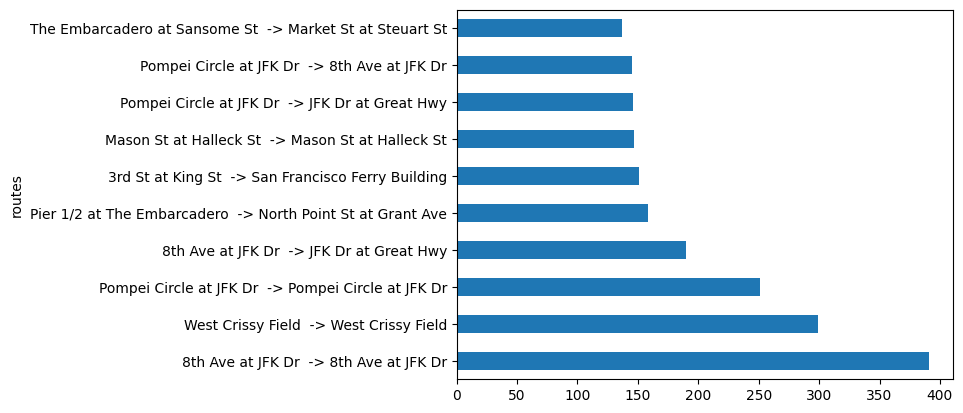

In [18]:
# Lets create a routes column and check which is the commonly used one

data['routes'] = data.start_station_name + '  -> ' + data.end_station_name
data.routes.value_counts()[:10].plot(kind='barh')

#We can chose to allocate more resources at this routes (bikes and employees )

<Axes: ylabel='start_station_name'>

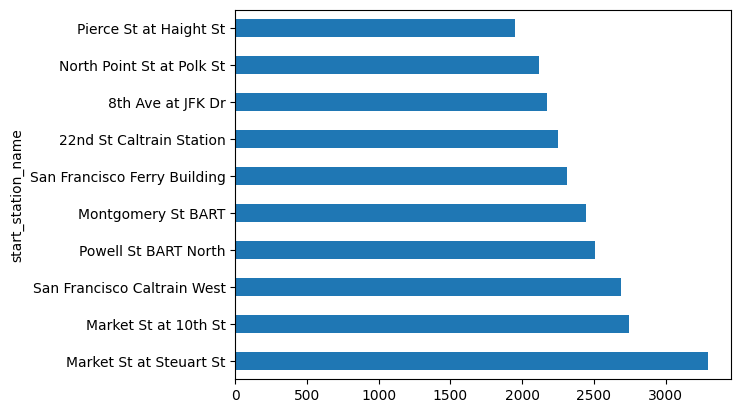

In [19]:
# These are the most common start stations
data.start_station_name.value_counts()[:10].plot(kind='barh')

<Axes: ylabel='end_station_name'>

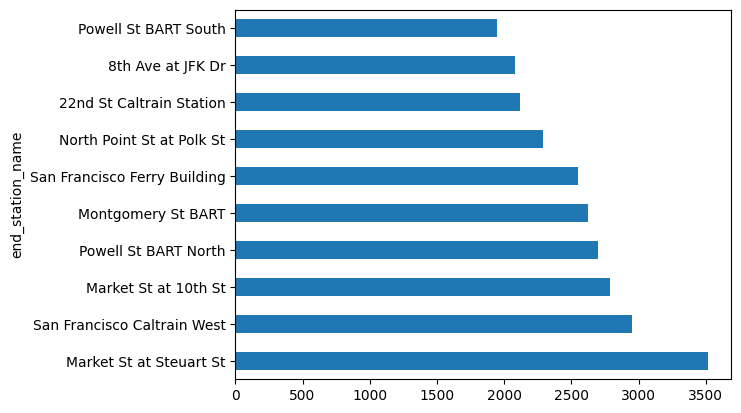

In [20]:
# These are the most common end stations
data.end_station_name.value_counts()[:10].plot(kind='barh')

# we notice the most common start station is also the most common end station
# probably the distance is minimal or is round route

In [21]:
data[data['routes'] == 'Market St at Steuart St  -> Market St at Steuart St'].head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,routes
245799,1BC3CCF476F3581F,electric_bike,2024-06-01 20:44:17.533,2024-06-01 20:44:30.595,Market St at Steuart St,SF-E29-2,Market St at Steuart St,SF-E29-2,37.794500,-122.394797,37.794525,-122.39488,member,Market St at Steuart St -> Market St at Steua...
245802,EB2B8349688EE701,electric_bike,2024-06-12 16:59:52.160,2024-06-12 17:00:08.121,Market St at Steuart St,SF-E29-2,Market St at Steuart St,SF-E29-2,37.794506,-122.394848,37.794525,-122.39488,member,Market St at Steuart St -> Market St at Steua...


In [22]:
most_common_route_distance=geodesic((37.794500,-122.394797),(37.794525,-122.39488)).m
most_common_route_distance
# we can see that the most common route is approximately 8 meters long
# Hence allocating more bikes would be reasonable 

7.819295747266919

In [23]:
data.started_at=pd.to_datetime(data['started_at'])
data.ended_at=pd.to_datetime(data['ended_at'])

In [24]:
data['Total_time_in_hours']=(data['ended_at'] - data['started_at']).dt.total_seconds()/3600
data['Total_time_in_hours']=data['Total_time_in_hours'].round(2)

<Axes: xlabel='member_casual', ylabel='Total_time_in_hours'>

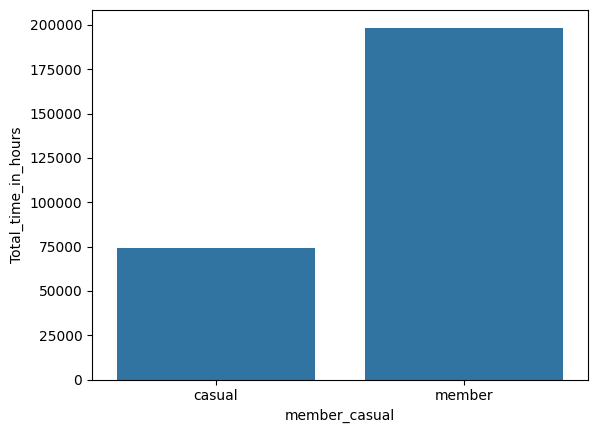

In [25]:
time_duration_by_member_casual=data.groupby('member_casual')['Total_time_in_hours'].count() # try mean() and compare how can we explain for mean?
sns.barplot(time_duration_by_member_casual)
#we see that members take more time count compared to casual

In [26]:
def calculate_distance(start_lat,start_lon,end_lat,end_lon):

    return geodesic((start_lat,start_lon),(end_lat,end_lon)).km

data['Distance_km']=data.apply(lambda row: calculate_distance(row['start_lat'],row['start_lng'],row['end_lat'],row['end_lng']),axis=1)

<Axes: xlabel='member_casual', ylabel='Distance_km'>

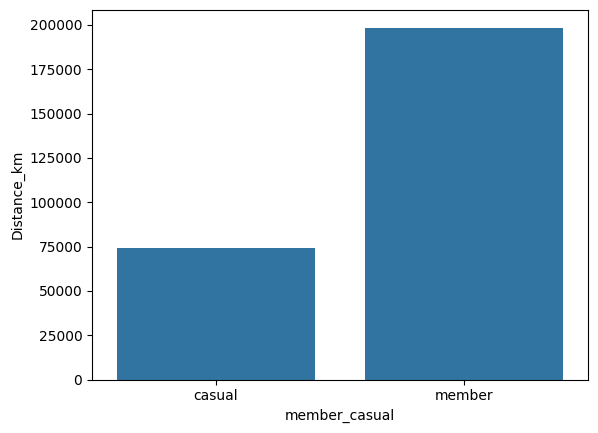

In [27]:
distance_by_member_casual_comparison=data.groupby('member_casual')['Distance_km'].count()
sns.barplot(distance_by_member_casual_comparison)
#also members have high travel distance compared to casuals

<Axes: xlabel='rideable_type', ylabel='Total_time_in_hours'>

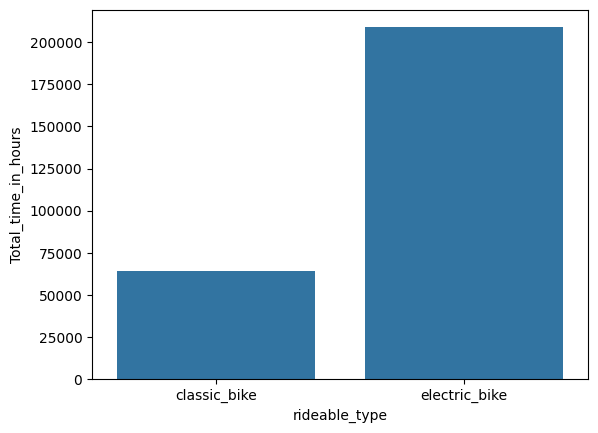

In [28]:
time_duration_by_rideable_type=data.groupby('rideable_type')['Total_time_in_hours'].count()
sns.barplot(time_duration_by_rideable_type)
#electric bikes have more trip hours compared to classic bikes

<Axes: xlabel='rideable_type', ylabel='Distance_km'>

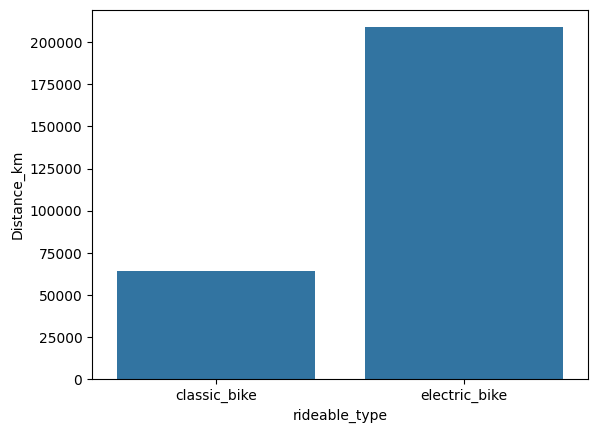

In [29]:
distance_by_rideable_type_comparison=data.groupby('rideable_type')['Distance_km'].count()
sns.barplot(distance_by_rideable_type_comparison)
#electric bikes have more distance count compared to classic ones

In [30]:
data['hour']=data['started_at'].dt.hour

<Axes: xlabel='hour', ylabel='Number_of_trips'>

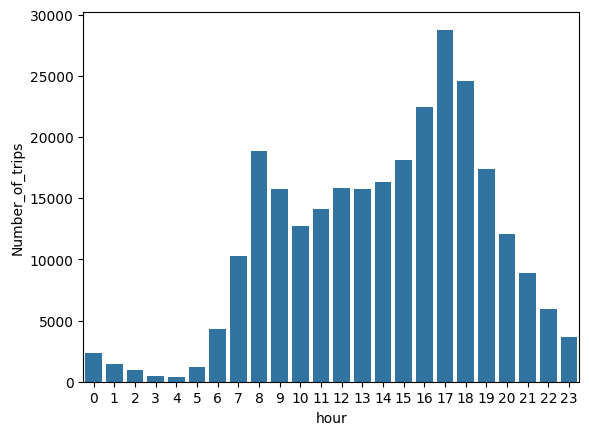

In [31]:
common_bike_hour=data.groupby('hour').ride_id.count().reset_index().rename(columns={'ride_id':'Number_of_trips'})
sns.barplot(data=common_bike_hour.sort_values(by='Number_of_trips'),x='hour',y='Number_of_trips')
# most of the riders like taking trips at 1700 hours

In [32]:
#I will be adding on this after learning more